In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### LOAD THE IMAGE WITH THE RGB FORMAT

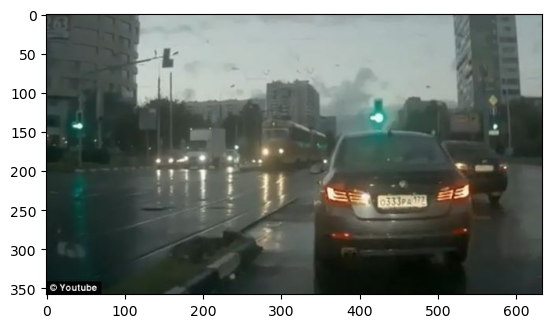

In [2]:
car_number_plate = cv2.imread('car_plate.jpg')
car_number_plate = cv2.cvtColor(car_number_plate, cv2.COLOR_BGR2RGB)
plt.imshow(car_number_plate)

## DETECT THE NUMBER PLATE PRESENT IN THE PICTURE AND BLUR IT.

(358, 634, 3)
(25, 74, 3)


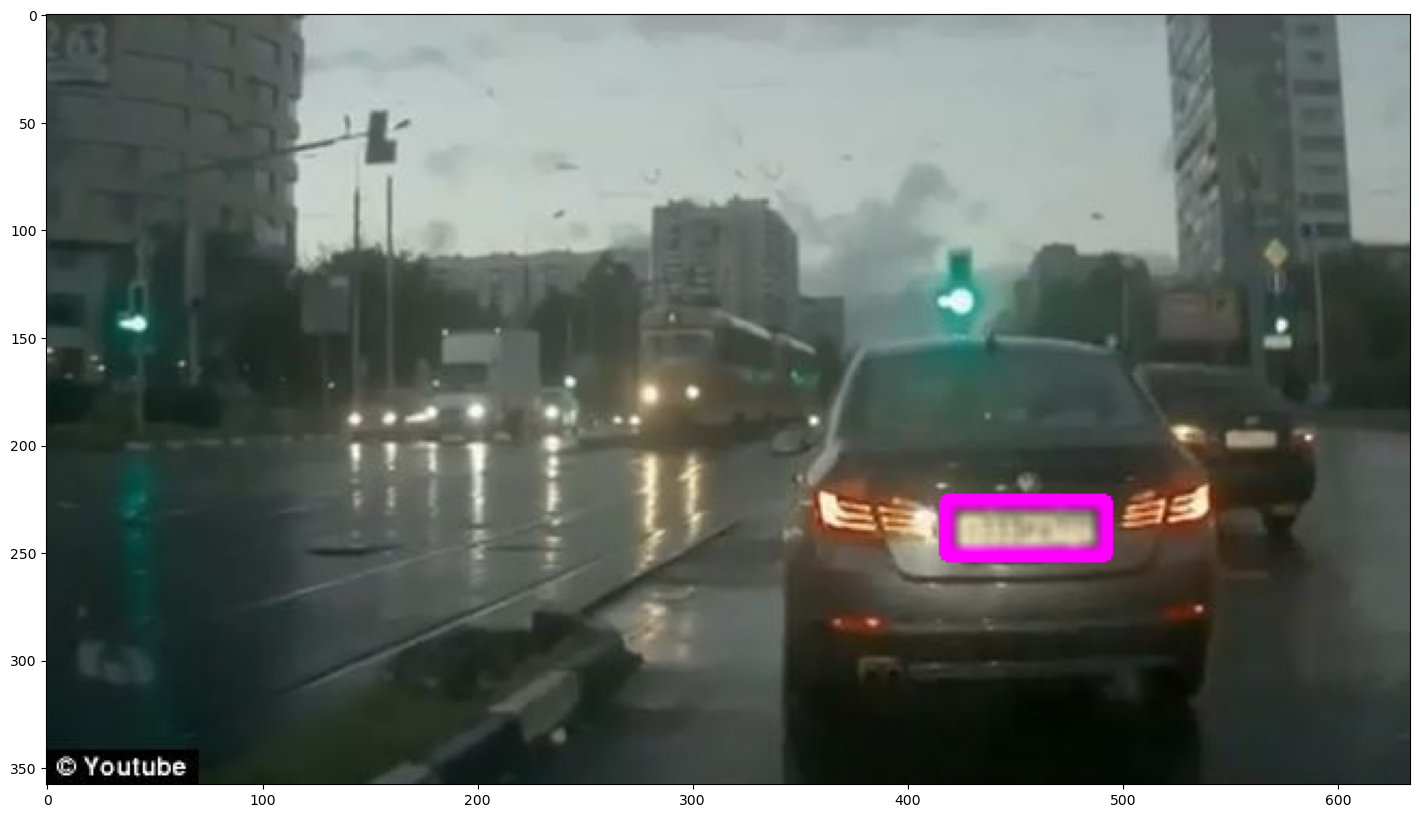

In [3]:
# Applying the cascading filter
car_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

# Getting the coordinates of the detected object i.e. number plate
number_plate_rectangles = car_cascade.detectMultiScale(car_number_plate, scaleFactor=1.2, minNeighbors=5)

for x,y,w,h in number_plate_rectangles:

    # Showing the detected part
    cv2.rectangle(car_number_plate,(x,y),(x+w,y+h),(255,0,255),5)

    # Finding out the Region of Interest for future work i.e. blurring
    part_to_be_blurred = car_number_plate[y:y+h,x:x+w]
    
    # Blurring the number plate part as a separate image
    blurred_number_plate = cv2.blur(src=part_to_be_blurred,ksize=(5,5))

    print(car_number_plate.shape)
    print(blurred_number_plate.shape)

    # Making copy of the original car image
    car_copy = car_number_plate.copy()

    # addWeighted failed here as the sizes of the images are different
    # blended_image = cv2.addWeighted(src1=car_number_plate,alpha=0.5,src2=blurred_number_plate,beta=0.5,gamma=0.1)

    
    # Pasting the small image on top of the big/original image
    car_copy[y:y+h,x:x+w] = blurred_number_plate


fig = plt.figure(figsize=(18,10))
# ax1 = plt.subplot(131)
# ax1.imshow(car_number_plate)

# ax2 = plt.subplot(132)
# ax2.imshow(blurred_number_plate)

ax3 = plt.subplot(111)
ax3.imshow(car_copy)

## ROUGH USE

In [54]:
image = cv2.imread('car_plate.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# blurred_car = cv2.blur(src=image, ksize=(7,7))

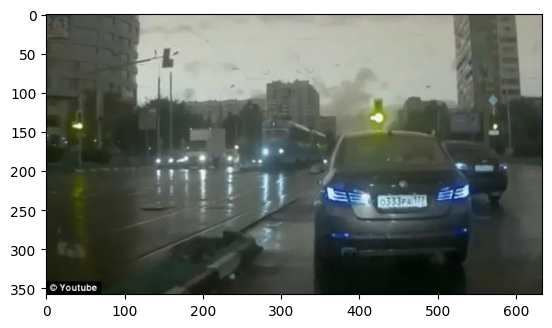

In [68]:
plt.imshow(image)

418 226
74 25

In [35]:
x_topleft,y_topleft = 418,226
x_bottomright,y_bottomright = 418+74, 226+25

In [59]:
x_bottomright

492

In [60]:
y_bottomright

251

In [48]:
image.shape

(358, 634)

In [56]:
# image

In [66]:
plate = image[y_topleft:y_bottomright,x_topleft:x_bottomright]

In [61]:
# plt.imshow(image[x_topleft:x_bottomright, y_topleft:y_bottomright])

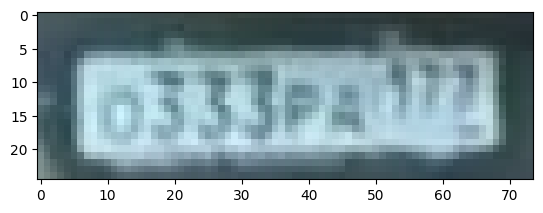

In [67]:
plt.imshow(plate)